<h1> Árbol generador de peso mínimo </h1>  
<p> 
Consideremos el siguiente problema: 
Supongamos que queremos establecer una red de comunicación entre un conjunto de localidades.
Es decir, cada localidad se debe poder comunicar el resto y hacer una conexión entre dos localidades
tiene cierto costo asociado. Lo que sería deseable es conectarlas con el menor costo posible.
</p>
<p> 
    El problema anterior puede ser descrito de una manera más formal así:
Sea $G(V,E)$ una gráfica no dirigida, con un peso positivo $c_e$ asociado a cada $e \in E$.
El problema es encontrar un subconjunto $T \subseteq E$ tal que la gráfica $G(V,T)$ sea 
conexa y el costo total $\sum_{e \in T } c_e $ sea mínimo. 
  </p> 

<p> 
La primera proposición que salta inmediatamente es que tal subgráfica $(V,T)$ debe ser un árbol.
En efecto, por definición $(V,T)$ debe ser conexa. Ahora, supongamos que tiene un ciclo $C$ y sea $e$ una arista en tal ciclo. Aseguramos que $(V, T - {e})$ sigue siendo conexa ya que cualquier camino que "pasaba" por $e$ puede, en su lugar,  tomar una ruta por el resto del ciclo. De aquí tenemos que $(V,T-{e})$ es una una gráfica cuyo costo total es menor que 
    $(V,T)$ lo cual es una contradicción. Y siendo conexa y acíclica entonces tal gráfica es un árbol. 
</p>

<img src="figejAGPM.png"> 
<p>
La figura anterior muestra una gráfica no dirigida con pesos en las aristas y uno de los árboles generadores de peso mínimo asociados a esta. El árbol 
    consiste de las aristas coloreadas en rojo y su peso es 75. 
</p> 

<h1> Diseño de algoritmos que resuelven el problema</h1> 
Este problema tiene una característica interesante y es que hay varias formas de resolverlo 
con estrategias voraces. A continuación se muestra 3 algoritmos que resuelven correctamente el problema, dos de los cuales serán explicados a detalle más adelante: 
<ul> 
    <li> 
        Uno de los algoritmos comienza sin aristas y va creando el árbol generador de peso 
        mínimo agregando las aristas en orden con respecto a sus costos. Se agrega una arista
        $e$ siempre y cuando $e$ no genere un ciclo con las arista que ya hemos añadido. Este 
        método es llamado el algoritmo de Kruskal. 
    </li> 
    <li> 
        Este otro algoritmo tiene un funcionamiento similar al algoritmo de Dijkstra. 
        Comenzamos con un nodo raíz $s$ y tratamos de expander el conjunto de nodos en el 
        árbol. En cada paso del algoritmo se agrega vorazmente 
        un nodo que tenga el costo mínimo de ser 
        añadido. Para hacerlo más preciso, tenemos un conjunto $S \subseteq V$ y en  
        cada iteración agregamos un nodo
        $v \in V-S$ que minimice el costo de ser agregado al arbol,
        $min_{e=(u,v):u \in S} C_e$ e inclyendo tal arista $e = (u,v)$  
        al árbol. Este método es llamado el algoritmo de Prim. 
    </li> 
    <li> 
       Finalmente, tenemos un algoritmo similar a Kruskal pero en orden inverso. 
        Esto es, comenzamos con todas las aristas y vamos eliminandolas en orden decreciente 
        con respecto a sus pesos. Eliminamos mientras la gráfica obtenida no sea disconexa. 
    </li> 
</ul>
<table> 
<tr> 
<td> <img src="figKruskal.png" width="250"/> </td> 
<td> <img src="figPrim.png" width="300"/> </td>   
</tr> 
</table> 
<p>
        En la imagen anterior podemos observar estados de la ejecución 
    del algoritmo de Kruskal (izquierda) y el algoritmo de Prim (derecha).
    Los nodos pertecientes al conjunto $S$ están coloreados mientras que los
    nodos del conjunto $V-S$ no tienen color. 
</p> 

<h2> Visualización de la ejecución de los algoritmos</h2> 
<p> 
   La célula a continuación ilustra la ejecución del algoritmo de Kruskal y Prim. 
   Ejecuta la célula. Una vez ejecutada verás 2 imagenes, la primera ilustra Kruskal y la segunda Prim.
   Haz click en la imagen del algoritmo que quieras ejecutar. Los botones para controlar la ejecución son los siguientes 
</p> 
<ul> 
    <li> 
        - Presiona <b>n</b> para ejecutar el siguiente paso. 
    </li> 
     <li> 
        - Presiona <b>+</b> para hacer más grande la imagen. 
    </li> 
     <li> 
        - Presiona <b>-</b> para hacer más pequeña la imagen. 
    </li> 
    
</ul> 

Output()

<IPython.core.display.Javascript object>


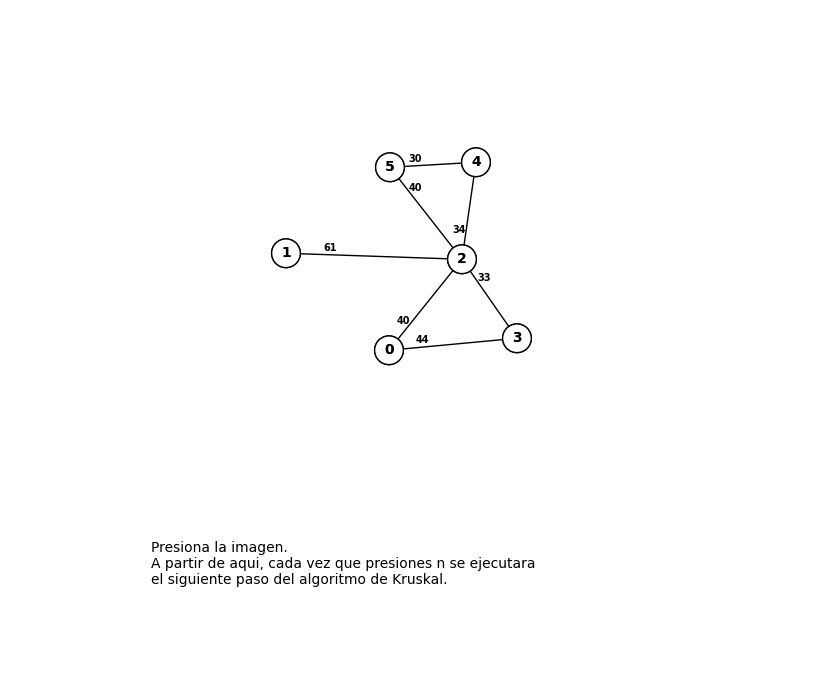

<IPython.core.display.Javascript object>


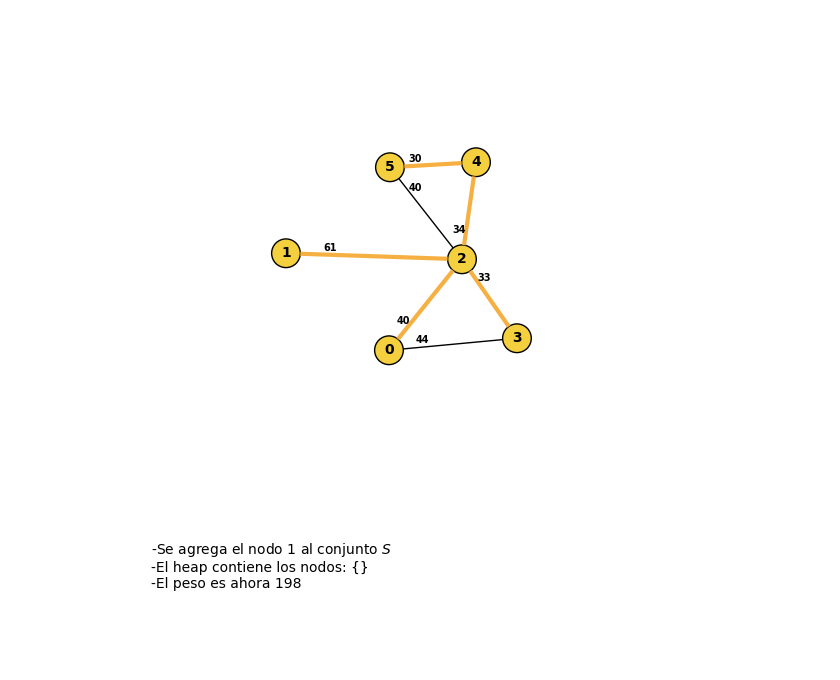

In [119]:
%run agpm_alg.ipynb

<h1> Analizando los algoritmos </h1> 
<p> Para demostrar la correctitud de los algoritmos con los que trataremos, primero necesitamos un lema, que 
    es el siguiente: supongamos que todos los costos son distintos. Sea $S$ un subconjunto de nodos que no es ni 
vacío ni igual a $V$ y sea $e=(v,w)$ una arista con el mínimo costo tiene un extremo en $S$ y otro extremo en $V - S$. Entonces todo árbol generador de peso mínimo contiene a $e$. 
    </p> 
    <p> 
    Sea $T$ un árbol que no contiene a $e$, demostraremos que no tiene costo mínimo. Usaremos 
    un argumento de intercambio, identificaremos una  arista $e'$ en $T$ que es más cara que $e$ 
    e intercambiando tales aristas construiremos un árbol mejor. 
    </p> 
    <p> 
    Bueno, lo importante es encontrar la arista $e'$ que será intercambiada. Recordemos que $v$ 
    y $w$ son los extremos de $e$. Luego, $T$ es 
    un árbol generador y por lo tanto existe un camino $P$ de $v$ a $w$. 
    Si seguimos este camino notamos que hay un primer nodo $w'$ en $V - S$. 
    Sea $v' \in P$ el nodo anterior a $w'$ y 
    $e'=(v',w')$ la arista que los une. Entonces, $e'$ es una arista con un 
    extremo en $S$ y otro en $V - S$ 
    </p> 
    <p> 
   Si intercambiamos $e$ con $e'$ tenemos un conjunto de aristas $T' = T - \{e'\} \cup \{e\}$. 
   Demostremos que $T'$ es un árbol generador. Esto es así ya que $(V,T')$ sigue siendo 
    conexa debido a que los caminos 
    que utilizaban $e'$ en $(V,T)$ pueden ser redirigidos en $(V,T')$ siguiento la porción 
    del camino $P$ desde $v'$ hasta $v$, tomando el vertice $e$ y luego la porción de $P$ desde 
    $w$ hasta $w'$. Luego, para ver que es acíclica, notemos que el único ciclo en 
    $(V,T' \cup \{e'\})$ es el que esta compuesto por $e$ y el camino $P$, y este ciclo ya
    no se encuentra en $(V,T')$. Con respecto a los costos, simplemente, notemos que la arista $e'$ tiene 
    un extremo en $S$ y otro en $V-S$, pero ya que $e$ es la arista con el costo mínimo de todas las aristas con 
    un extremo en $S$ y otro en $V-S$ entonces 
    el árbol contruido $T'$ tiene costo menor que $T$. 
</p>
<img src="fig1.png"> 

<h2> Correctitud de Kruskal </h2> 
<p> 
    Consider la arista $e = (v,w)$ añadida por el algoritmo de Kruskal. Sea $S$ el conjunto de nodos para los cuales 
    hay un camino al nodo $v$ justo antes de que la arista sea agregada por el algoritmo de Kruskal. Notemos que $v \in S$
    y $w \not \in S$ dado que $e$ no crea un ciclo. Además ninguna arista de $S$ a $V-S$ ha sido considerada aún, ya que 
    cualquiera de estas aristas podieron haber sido añadidas sin crear un ciclo y por lo tanto, si fuera el caso, serían 
    añadidas 
    por el algoritmo de Kruskal. Entonces, ya que al principio las aristas son ardenadas, $e$, al ser la primera, es la arista con un extremo 
    en $S$ y uno en $V - S$ con el costo menor. Y por el lema anterior tal arista pertence a todos los árboles generadores 
    de peso mínimo. Lo cual muestra la correctitud del algoritmo de Kruskal. 
</p> 

<h2> Correctitud de Prim </h2> 
En cada iteracion el algoritmo mantiene un conjunto $S \subseteq V$ sobre el que un árbol generador parcial se ha 
construido, un nodo $v$ y una arista $e$ son añadidos de manera que minimizan la cantidad 
$min_{e = (u,v):u \in S}c_e$. Por definición $e$ es la arista con el 
costo mínimo con un extremo en $S$ y otro en $V- S$ y por el lema anterior tenemos que está en cada uno de los árboles 
generadores de peso mínimo. Lo cual muestra la correctitud del algoritmo Prim.  

<h1> Implementación del algoritmo de Prim y Kruskal</h1> 

<h2> Implementación de Prim </h2> 
<p> 
El algoritmo de Prim y Kruskal pueden ser implementados en tiempo $O(m \log(n))$ si se escogen las estructura adecuadas. 
En el caso del algoritmo de Prim, las implementaciones del algoritmo de Prim y el algoritmo de Dijkstra son casi 
identicas. Analogo al algoritmo de Dijstra tenemos que decidir que nodo vamos a agregar a continuacion a $S$ manteniendo
    para cada nodo $v \in V-S$ el costo de agregarlo $a(v) = min_{e=(u,v): u \in S}c_e$. 
    Esto lo hacemos igual que en el algortimo de Dijkstra, mantenemos los nodos y su peso en un minheap. 
    Como ya vimos, las operaciones de extraer el mínimo y cambiar el 
valor de una llave en el heap es $O(\log(n))$. Ya que extraemos al mínimo $n-1$ veces, entonces 
la complejidad total es $O(m\log(n))$  donde $m$ es el número de aristas y $n$ es el número de nodos en la gráfica 
</p> 
    

<h2> Implementación de Kruskal </h2> 